# Introduction

In this tutorial, I will show logistic regression algorithms. Step by step I will show you what mathematical formulas we need to use. I'll show you how to do this using the sklearn library and how to do it without it.

Logistic Regression algorithm is used to predict if the result is Yes or No, A or B, Cat or Dog etc. Our data set includes back pain symptoms that are classified as Abnormal or Normal and suitable for applying Logistic Regression.

Logistic regression is the most famous machine learning algorithm after linear regression. In a lot of ways, linear regression and logistic regression are similar. But, the biggest difference lies in what they are used for. Linear regression algorithms are used to predict/forecast values but logistic regression is used for classification tasks.

Prostate cancer is a disease in which malignant (cancer) cells form in the tissues of the prostate.

Our data set contains prostate cells that are classified as good or bad and are appropriate for the use of logistic regression.
first, let's import the necessary libraries.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

#import warnings
#warnings.filterwarnings("ignore", category=FutureWarning)

import os
print(os.listdir("./input"))

['BreadBasket_DMS.csv', 'column_2C_weka.csv', 'column_3C_weka.csv', 'googleplaystore.csv', 'googleplaystore_user_reviews.csv', 'kmeans01.png', 'Prostate_Cancer.csv', 'sample_submission.csv', 'sample_submission5.csv', 'test.csv', 'test5.csv', 'train.csv', 'train5.csv', 'X.npy', 'Y.npy']


**Exploratory Data Analysis**

First, we need to explore our data set. in this, we need some statistical data.

In [2]:
df = pd.read_csv('./input/Prostate_Cancer.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


There are 10 columns and 100 rows in total. There is no missing value. There are 1 types of objects, while others are INT and float types. I will convert all columns to float type in order to make it more convenient. I'il erase your id value.

In [84]:
df.drop(["id"],axis=1,inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis_result   100 non-null    object 
 1   radius             100 non-null    int64  
 2   texture            100 non-null    int64  
 3   perimeter          100 non-null    int64  
 4   area               100 non-null    int64  
 5   smoothness         100 non-null    float64
 6   compactness        100 non-null    float64
 7   symmetry           100 non-null    float64
 8   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 7.2+ KB


In [85]:
# we convert data type the float.
columns = ['radius','texture','perimeter','area']

for column in columns:
    df[column] = df[column].astype(float)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis_result   100 non-null    object 
 1   radius             100 non-null    float64
 2   texture            100 non-null    float64
 3   perimeter          100 non-null    float64
 4   area               100 non-null    float64
 5   smoothness         100 non-null    float64
 6   compactness        100 non-null    float64
 7   symmetry           100 non-null    float64
 8   fractal_dimension  100 non-null    float64
dtypes: float64(8), object(1)
memory usage: 7.2+ KB


Let's look at the data for the first 15.

In [87]:
df.head(15)

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,23.0,12.0,151.0,954.0,0.143,0.278,0.242,0.079
1,B,9.0,13.0,133.0,1326.0,0.143,0.079,0.181,0.057
2,M,21.0,27.0,130.0,1203.0,0.125,0.160,0.207,0.060
3,M,14.0,16.0,78.0,386.0,0.070,0.284,0.260,0.097
4,M,9.0,19.0,135.0,1297.0,0.141,0.133,0.181,0.059
5,B,25.0,25.0,83.0,477.0,0.128,0.170,0.209,0.076
6,M,16.0,26.0,120.0,1040.0,0.095,0.109,0.179,0.057
7,M,15.0,18.0,90.0,578.0,0.119,0.165,0.220,0.075
8,M,19.0,24.0,88.0,520.0,0.127,0.193,0.235,0.074
9,M,25.0,11.0,84.0,476.0,0.119,0.240,0.203,0.082


diagnosis_result column includes only two class names; M and B. Let's convert it as 1 and 0.

In [88]:
#Convert two class names to 0 and 1           # malignant:1    begin:0
df.diagnosis_result = [1 if each == "M" else 0 for each in df.diagnosis_result]

describe is gives some statistical values about data set, such as max,min,mean,median etc.

In [89]:
df.describe()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.620000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,0.487832,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,0.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,0.000000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,1.000000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,1.000000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,1.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


**Assigning X and Y values**

We need to split our data into two dimension as x and y values. y value is our class name, which gives if the row is M or B. So, we assign diagnosis_result column as y values then drop the column from data set. The rest of the data ; all radius, texture..., fractal_dimension columns will be our x value.

In [90]:
#assign Class_att column as y attribute 
y = df.diagnosis_result.values # values > numpy array

#drop Class_att column, remain only numerical columns
x_data = df.drop(["diagnosis_result"],axis=1)

**Normalization**

Statistical data shows us how big some values are and how small some values are. Here, 1area data is so big that it affects others. For example, 1symetry data is very small, and when we use it to process it will have no effect, because other data is very large. So we need to normalize this. Below is the formula for normalization. Here, the minimum value of each value is subtracted from itself and then the maximum value of each value is subtracted from the minimum value. We're splitting each other.

**Normalization = (x - min(x))/(max(x)-min(x))**

In [91]:
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

**Let's split the data as test and train.**

We need to determine whether our algorithm is successful. We're going to split the data for this. Where 20% of the data is usually test data and 80% is training data. We'il train our algorithm. At the end of the training we will compare the results with the real data.

The Train_test_split function randomly divides data. If we give a random_state parameter, it always splits the data in the same way. This prevents you from receiving different results each time you run the entire algorithm. the random_state = 42 parameter is used to stabilize randomization. random_state divides the data randomly, but you receive the same train and test data according to a rule and each time you run the algorithm.

In [92]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state =42)

In [93]:
x.shape

(100, 8)

At this point, there are two methods. The first is a long way to apply mathematical formulas and the other is a short way to use the sklearn library. The above code is common to both solutions.

Before you begin, I will transpose all x_train, x_test, y_train, y_test  matrices to make the matrix multiplication easier for the next steps.

In [94]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [95]:
x_train.shape #(feature, batch)

(8, 80)

In [96]:
y_train.shape #(batch)

(80,)

**The First Way**

![](https://cdn-images-1.medium.com/max/800/1*X-FJtdd1MgyA-h5ovc7X5w.jpeg)

Most often, we would want to predict our outcomes as YES/NO (1/0).

For example:

Is your favorite football team going to win the match today? — yes/no (0/1)

Does a student pass in exam? — yes/no (0/1)

The logistic function is given by:

f(x) = L/(1+e ^-k(x-x0))

where

L – Curve’s maximum value

k – Steepness of the curve

x0 – x value of Sigmoid’s midpoint

A standard logistic function is called sigmoid function (k=1,x0=0,L=1)

In [97]:
#parameter initialize and sigmoid function
def initialize_weights_and_bias(dimension):
    
    w = np.full((dimension,1),0.01) #first initialize w values to 0.01
    b = 0.0 #first initialize bias value to 0.0
    return w,b

This is sigmoid formula -> S(x) = 1/1+ ( e ^ - x)

The sigmoid function gives an ‘S’ shaped curve.

This curve has a finite limit of:

‘0’ as x approaches −∞

‘1’ as x approaches +∞

The output of sigmoid function when x=0 is 0.5

Thus, if the output is more tan 0.5 , we can classify the outcome as 1 (or YES) and if it is less than 0.5 , we can classify it as 0(or NO) .

In [98]:
#sigmoid function fits the z value between 0 and 1
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

Let's write a function that calculates y_head, loss and cost values as forward propagation, and calculates derivatives of w and b as backpropagation.

In [99]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    
    y_head = sigmoid(np.dot(w.T,x_train) + b) # (1x8)X( 8x80) + 
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # backward propagation
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight" : derivative_weight, "derivative_bias" : derivative_bias}
    
    return cost,gradients

if the weight and bias values are not as desired, we will update them with the following function.

In [100]:
def update_weight_and_bias(w,b,x_train,y_train,learning_rate,iteration_num) :
    cost_list = []
    index = []
    
    #for each iteration, update w and b values
    for i in range(iteration_num):
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        w = w - learning_rate*gradients["derivative_weight"]
        b = b - learning_rate*gradients["derivative_bias"]
        
        cost_list.append(cost)
        index.append(i)

    parameters = {"weight": w,"bias": b}
    
    print("iteration_num:",iteration_num)
    print("cost:",cost)

    #plot cost versus iteration graph to see how the cost changes over number of iterations
    plt.plot(index,cost_list)
    plt.xlabel("Number of iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

We're writing our code for the guess. Here we have already obtained the necessary w and b values.

In [101]:
def predict(w,b,x_test):
    z = np.dot(w.T,x_test) + b
    y_predicted_head = sigmoid(z)
    
    #create new array with the same size of x_test and fill with 0's.
    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_predicted_head.shape[1]):
        if y_predicted_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

We combine all the formulas in a function. For accuracy, we compare the y_test value and the calculated y_prediction array. Both arrays contain values 0 and 1. If y_test and y_prediction are the same, the result is true.

In [104]:
def logistic_regression(x_train,y_train,x_test,y_test,learning_rate,iteration_num):
    dimension = x_train.shape[0]#For our dataset, dimension is 248
    w,b = initialize_weights_and_bias(dimension)
    
    parameters, gradients = update_weight_and_bias(w,b,x_train,y_train,learning_rate,iteration_num)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    # Print test Accuracy
    print("manuel test accuracy:",(100 - np.mean(np.abs(y_prediction - y_test))*100)/100)

In [105]:
x_train.shape

(8, 80)

we will give some values to learning rate and number_of_iterations parameters. Start with learning_rate = 1 and number_of_iterations = 10

iteration_num: 10
cost: 0.596109042091418


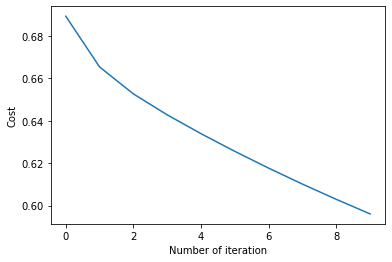

manuel test accuracy: 0.8


In [106]:
logistic_regression(x_train,y_train,x_test,y_test,1,10)

Now let's give Learning_rate = 10 and number_of_iterations = 10.

iteration_num: 10
cost: 0.8968661946318932


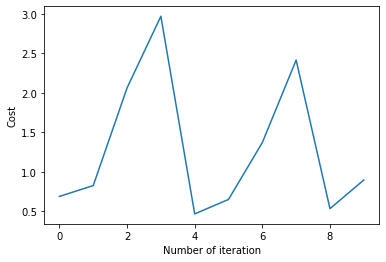

manuel test accuracy: 0.35


In [107]:
logistic_regression(x_train,y_train,x_test,y_test,10,10)

as learning_rate increases, it increases in cost, but it increases in accuracy.

iteration_num: 200
cost: 0.28535738372042474


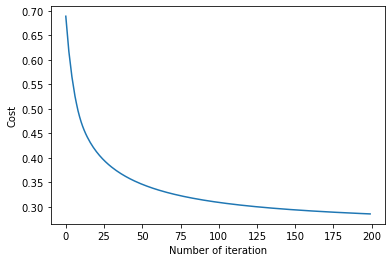

manuel test accuracy: 0.85


In [108]:
logistic_regression(x_train,y_train,x_test,y_test,4,200)

when learning_rate = 4 and iteration_number = 200, the cost has been reduced too. The truth rate is very high.

**The Second Way : Sklearn Library **

With using sklearn library, we can create a logistic regression model and find the accuracy easliy like below:

In [109]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(x_train.T,y_train.T)

print("sklearn test accuracy:", lr_model.score(x_test.T,y_test.T))

sklearn test accuracy: 0.8


# **Conclusion**

* If you like it, thank you for you upvotes.
* If you have any question, I will happy to hear it